<a href="https://colab.research.google.com/github/vcwild/fashion-mnist-classifier/blob/main/image_classifier_underlying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

## Import dataset

In [2]:
dataset = keras.datasets.fashion_mnist

## Train-test split

In [3]:
((X_train, y_train),(X_test, y_test)) = dataset.load_data()

# EDA

### Plot an image from the dataset

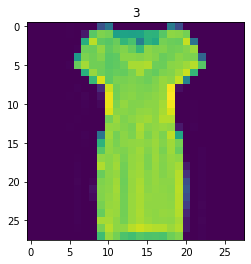

In [4]:
plt.imshow(X_train[20])
plt.title(y_train[20]);

### Plot a sequence of 10 images

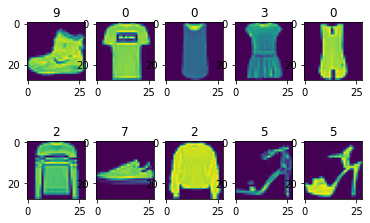

In [5]:
for i in range(0, 10, 1):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i])
  plt.title(y_train[i]);

## Add labels

In [6]:
labels = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
]

### Plot previous images with labels

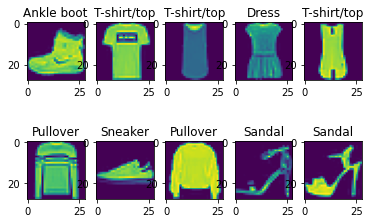

In [7]:
for i in range(0, 10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i])
  plt.title(labels[y_train[i]]);

## Verify color range

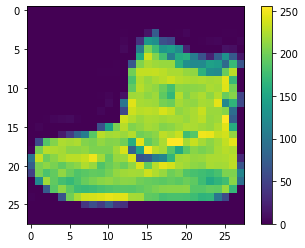

In [8]:
plt.imshow(X_train[0])
plt.colorbar();

# Preprocessing

## Apply normalization

In [9]:
X_train_proc = X_train/float(255)

# ML

## Define model

In [10]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),
  keras.layers.Dense(256, activation=tensorflow.nn.relu),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

## Define Optimizer

In [75]:
adam = keras.optimizers.Adam(lr=0.002) # lr -> learning rate (momentum)

## Train

### Define Callbacks

In [80]:
early_stop = [
  keras.callbacks.EarlyStopping(monitor='val_loss'),
  keras.callbacks.ModelCheckpoint(filepath='best_model.hdf5', monitor='val_loss', save_best_only=True)
]

### Compile model

In [82]:
model.compile(
  optimizer=adam, 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)

### Fit model

In [83]:
fitted = model.fit(
    X_train_proc, y_train, 
    epochs=10, 
    batch_size=480, 
    validation_split=0.2, 
    callbacks=early_stop
  )

Epoch 1/10
100/100 [==============================] - 2s 15ms/step - loss: 0.4815 - accuracy: 0.8456 - val_loss: 0.5334 - val_accuracy: 0.8524
Epoch 2/10
100/100 [==============================] - 1s 13ms/step - loss: 0.4787 - accuracy: 0.8482 - val_loss: 0.5135 - val_accuracy: 0.8530
Epoch 3/10
100/100 [==============================] - 1s 14ms/step - loss: 0.4571 - accuracy: 0.8533 - val_loss: 0.5130 - val_accuracy: 0.8515
Epoch 4/10
100/100 [==============================] - 1s 13ms/step - loss: 0.4552 - accuracy: 0.8526 - val_loss: 0.4797 - val_accuracy: 0.8583
Epoch 5/10
100/100 [==============================] - 1s 13ms/step - loss: 0.4347 - accuracy: 0.8587 - val_loss: 0.4960 - val_accuracy: 0.8488


## Metrics

### Plot epoch accuracy

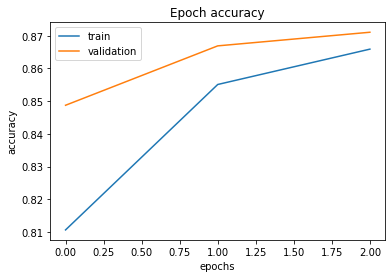

In [13]:
plt.plot(fitted.history['accuracy'])
plt.plot(fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

### Plot epoch loss

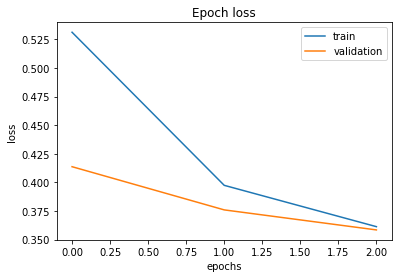

In [14]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

### Model summary

In [15]:
model_summary = model.summary()
model_summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Model config

In [16]:
model.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

## Save default model

In [17]:
model.save('model.h5')

## Modify dense layer weights

### Get 'dense' layer weights (second layer)

In [18]:
dense_layer_weights = model.layers[1].get_weights()[0]
dense_layer_weights

array([[ 0.06186315, -0.0408384 , -0.03793761, ...,  0.02134273,
         0.00818849, -0.10992537],
       [-0.00073403,  0.06768914, -0.03148326, ..., -0.06254236,
        -0.01487919,  0.00772816],
       [ 0.01869899,  0.08116814, -0.10294012, ...,  0.00472744,
        -0.16547494, -0.16029465],
       ...,
       [-0.068996  ,  0.02421245, -0.20089382, ...,  0.03730161,
        -0.1307222 , -0.16188139],
       [-0.09806649,  0.03523531, -0.12118427, ...,  0.06317835,
        -0.1405002 , -0.13480052],
       [ 0.00094958,  0.04924494, -0.17881288, ...,  0.10022511,
        -0.03438067, -0.07357812]], dtype=float32)

### Create null dense layer weights vector

In [19]:
dense_layer_weights.shape

(784, 256)

In [20]:
null_dense_layer_weights = np.zeros(dense_layer_weights.shape)

### Get 'dense' layer biases

In [21]:
dense_layer_biases = model.layers[1].get_weights()[1]
dense_layer_biases

array([ 0.04577652,  0.05650165,  0.08235255, -0.2250395 ,  0.21942593,
        0.02346002, -0.22940311,  0.1760667 ,  0.00693839,  0.05054035,
        0.08567171, -0.03406072,  0.13533464,  0.18775305,  0.19440413,
        0.20831393,  0.17209098, -0.0205198 , -0.05790775,  0.09881696,
       -0.01171683, -0.13103513,  0.04810822,  0.2851151 ,  0.02441771,
       -0.16459957, -0.12033836,  0.00345229,  0.07234731,  0.06862406,
       -0.01333632,  0.13908233, -0.02376963, -0.04337515,  0.3193429 ,
        0.250434  ,  0.17369424,  0.30549222, -0.00675787,  0.1335764 ,
        0.2261672 ,  0.10400167,  0.03044468, -0.01694731,  0.13133228,
        0.02647914, -0.10635119,  0.06622387,  0.00374562,  0.06613271,
       -0.1340519 ,  0.08667677, -0.09215108,  0.04619385, -0.19850466,
        0.0553499 ,  0.28416392,  0.00529943,  0.18231966,  0.3061975 ,
        0.10443014,  0.3120581 ,  0.15338624,  0.0133946 ,  0.09092991,
        0.13732547, -0.08820379,  0.30628765, -0.13697459, -0.00


### Set model dense layer weights to null, use dense layer biases

In [50]:
model.layers[1].set_weights([null_dense_layer_weights, dense_layer_biases])

In [51]:
model.layers[1].get_weights()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
# recompile model
model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)
uniform_fitted = model.fit(X_train_proc, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5818 - accuracy: 0.7904 - val_loss: 0.4309 - val_accuracy: 0.8475
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4148 - accuracy: 0.8484 - val_loss: 0.3916 - val_accuracy: 0.8622
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3767 - accuracy: 0.8630 - val_loss: 0.3558 - val_accuracy: 0.8683


### Uniform weight model metrics

#### Uniform weights epoch accuracy

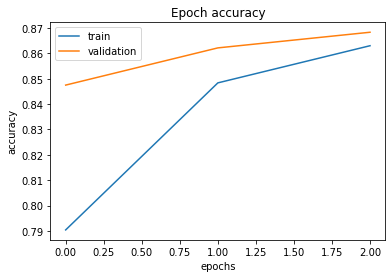

In [53]:
plt.plot(uniform_fitted.history['accuracy'])
plt.plot(uniform_fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

#### Uniform weights epoch loss

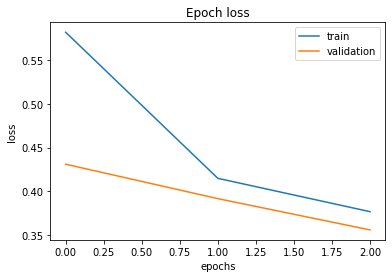

In [54]:
plt.plot(uniform_fitted.history['loss'])
plt.plot(uniform_fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

### Create random dense layer weights

In [27]:
random_dense_layer_weights = np.random.rand(dense_layer_weights.shape[np.array([0]).item()], dense_layer_weights.shape[np.array([1]).item()])

### Set model dense layer weights to random, use dense layer biases

In [55]:
model.layers[1].set_weights([random_dense_layer_weights, dense_layer_biases])
model.layers[1].get_weights()[0]

array([[0.6324038 , 0.35444263, 0.38455904, ..., 0.7351259 , 0.7658435 ,
        0.7836362 ],
       [0.18102963, 0.5907329 , 0.43877277, ..., 0.4626907 , 0.6252049 ,
        0.9466245 ],
       [0.3524115 , 0.76084924, 0.48562902, ..., 0.5320383 , 0.05057818,
        0.45248705],
       ...,
       [0.65070176, 0.73584145, 0.14206727, ..., 0.29471776, 0.24359356,
        0.8486323 ],
       [0.09205861, 0.31387368, 0.5632223 , ..., 0.01449727, 0.37547895,
        0.00852079],
       [0.98596853, 0.5795224 , 0.09598101, ..., 0.35563442, 0.09788168,
        0.7472276 ]], dtype=float32)

In [56]:
# recompile model
model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)
random_fitted = model.fit(X_train_proc, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 4s 3ms/step - loss: 47.8008 - accuracy: 0.4297 - val_loss: 6.9293 - val_accuracy: 0.7128
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 11.4547 - accuracy: 0.6240 - val_loss: 6.2239 - val_accuracy: 0.6747
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 5.5012 - accuracy: 0.6684 - val_loss: 3.5819 - val_accuracy: 0.6635


### Random weights model metrics

#### Plot epoch accuracy

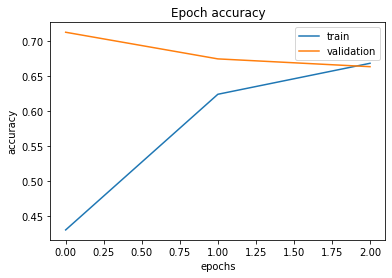

In [57]:
plt.plot(random_fitted.history['accuracy'])
plt.plot(random_fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

#### Plot epoch loss

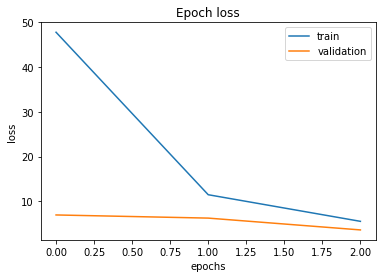

In [58]:
plt.plot(random_fitted.history['loss'])
plt.plot(random_fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

## Modify dense layer biases

In [38]:
dense_layer_biases.shape

(256,)

### Create null dense layer biases vector

In [39]:
null_dense_layer_biases = np.zeros(dense_layer_biases.shape[0])

### Set model dense layer weights to null, set biases to null

In [59]:
model.layers[1].set_weights([null_dense_layer_weights, null_dense_layer_biases])
model.layers[1].get_weights()

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [60]:
# recompile model
model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)
uniform_wb_fitted = model.fit(X_train_proc, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 4s 3ms/step - loss: 3.6457 - accuracy: 0.1001 - val_loss: 3.0017 - val_accuracy: 0.0995
Epoch 2/3
1500/1500 [==============================] - 4s 3ms/step - loss: 2.6916 - accuracy: 0.1001 - val_loss: 2.4808 - val_accuracy: 0.0995
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3875 - accuracy: 0.1001 - val_loss: 2.3303 - val_accuracy: 0.0995


### Uniform weights and biases model metrics

#### Uniform w/b epoch accuracy

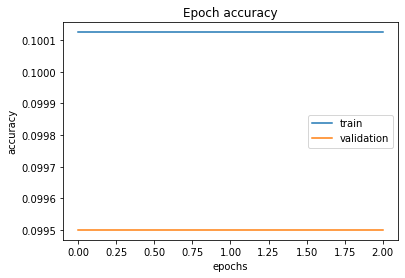

In [61]:
plt.plot(uniform_wb_fitted.history['accuracy'])
plt.plot(uniform_wb_fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

#### Uniform w/b epoch loss

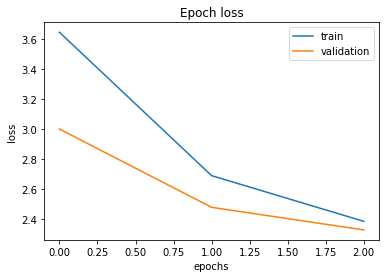

In [62]:
plt.plot(uniform_wb_fitted.history['loss'])
plt.plot(uniform_wb_fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

### Set model dense layer weights to random, set biases to null

In [64]:
model.layers[1].set_weights([random_dense_layer_weights, null_dense_layer_biases])
model.layers[1].get_weights()

[array([[0.6324038 , 0.35444263, 0.38455904, ..., 0.7351259 , 0.7658435 ,
         0.7836362 ],
        [0.18102963, 0.5907329 , 0.43877277, ..., 0.4626907 , 0.6252049 ,
         0.9466245 ],
        [0.3524115 , 0.76084924, 0.48562902, ..., 0.5320383 , 0.05057818,
         0.45248705],
        ...,
        [0.65070176, 0.73584145, 0.14206727, ..., 0.29471776, 0.24359356,
         0.8486323 ],
        [0.09205861, 0.31387368, 0.5632223 , ..., 0.01449727, 0.37547895,
         0.00852079],
        [0.98596853, 0.5795224 , 0.09598101, ..., 0.35563442, 0.09788168,
         0.7472276 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

In [65]:
# recompile model
model.compile(
  optimizer='adam', 
  loss='sparse_categorical_crossentropy', 
  metrics=['accuracy']
)
random_weights_uniform_biases_fitted = model.fit(X_train_proc, y_train, epochs=3, validation_split=0.2)

Epoch 1/3
1500/1500 [==============================] - 4s 3ms/step - loss: 19.3501 - accuracy: 0.3933 - val_loss: 3.4951 - val_accuracy: 0.6362
Epoch 2/3
1500/1500 [==============================] - 5s 3ms/step - loss: 6.1076 - accuracy: 0.5604 - val_loss: 3.0822 - val_accuracy: 0.6348
Epoch 3/3
1500/1500 [==============================] - 4s 3ms/step - loss: 3.6746 - accuracy: 0.6348 - val_loss: 1.7227 - val_accuracy: 0.7381


### Random weights and uniform biases model metrics

#### Random weights and uniform biases epoch accuracy

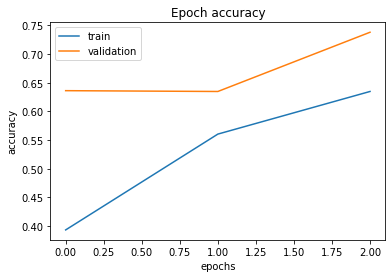

In [66]:
plt.plot(random_weights_uniform_biases_fitted.history['accuracy'])
plt.plot(random_weights_uniform_biases_fitted.history['val_accuracy'])
plt.title('Epoch accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation']);

#### Random weights and uniform biases epoch loss

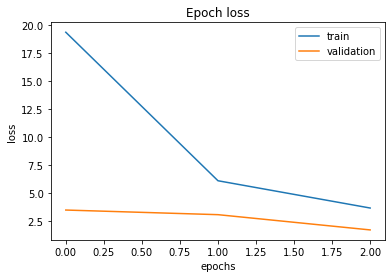

In [67]:
plt.plot(random_weights_uniform_biases_fitted.history['loss'])
plt.plot(random_weights_uniform_biases_fitted.history['val_loss'])
plt.title('Epoch loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation']);

## Import saved models

In [84]:
saved_model = load_model('model.h5')
best_model = load_model('best_model.hdf5')

## Test

### Apply predictions

In [69]:
results = model.predict(X_test)

In [70]:
saved_model_results = saved_model.predict(X_test)

In [85]:
best_model_results = best_model.predict(X_test)

### Compare predictions

In [89]:
item = 20
pd.DataFrame({
    'test_results': np.argmax(results[item]),
    'saved_model_results': np.argmax(saved_model_results[item]),
    'best_model_results': np.argmax(best_model_results[item]),
    'true_values': y_test[item]
}, index=[item])

,test_results,saved_model_results,best_model_results,true_values
20,6,2,2,2


## Validate

### Evaluate models

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 778.8568 - accuracy: 0.7950


[778.8568115234375, 0.7950000166893005]